# Part A. ANOVA

Additional Material: ANOVA tutorial

https://datascienceplus.com/one-way-anova-in-r/

Jet lag is a common problem for people traveling across multiple time zones, but people can gradually adjust to the new time zone since the exposure of the shifted light schedule to their eyes can resets the internal circadian rhythm in a process called “phase shift”. Campbell and Murphy (1998) in a highly controversial study reported that the human circadian clock can also be reset by only exposing the back of the knee to light, with some hailing this as a major discovery and others challenging aspects of the experimental design. The table below is taken from a later experiment by Wright and Czeisler (2002) that re-examined the phenomenon. The new experiment measured circadian rhythm through the daily cycle of melatonin production in 22 subjects randomly assigned to one of three light treatments. Subjects were woken from sleep and for three hours were exposed to bright lights applied to the eyes only, to the knees only or to neither (control group). The effects of treatment to the circadian rhythm were measured two days later by the magnitude of phase shift (measured in hours) in each subject’s daily cycle of melatonin production. A negative measurement indicates a delay in melatonin production, a predicted effect of light treatment, while a positive number indicates an advance.

Raw data of phase shift, in hours, for the circadian rhythm experiment

|Treatment|Phase Shift (hr)                            |
|:--------|:-------------------------------------------|
|Control  |0.53, 0.36, 0.20, -0.37, -0.60, -0.64, -0.68, -1.27|
|Knees    |0.73, 0.31, 0.03, -0.29, -0.56, -0.96, -1.61       |
|Eyes     |-0.78, -0.86, -1.35, -1.48, -1.52, -2.04, -2.83    |

## Question A1 - 3 pts

Consider the following incomplete R output:

|Source|Df |Sum of Squares|Mean Squares|F-statistics|p-value|
|:----:|:-:|:------------:|:----------:|:----------:|:-----:|
|Treatments|2|7.224|3.6122|7.289|0.004|
|Error|19|9.415|0.496| | |
|TOTAL|21|16.64| | | |

Fill in the missing values in the analysis of the variance table.Note: Missing values can be calculated using the corresponding formulas provided in the lectures, or you can build the data frame in R and generate the ANOVA table using the aov() function. Either approach will be accepted.

Full coding solution below.

## Question A2 - 3 pts

Use $\mu_1$, $\mu_2$, and $\mu_3$  as notation for the three mean parameters and define these parameters clearly based on the context of the topic above(i.e. explain what  $\mu_1$, $\mu_2$, and $\mu_3$ mean in words in the context of this problem). Find the estimates of these parameters.

$\mu_1$: The mean of the control group. This value is -0.30875.

$\mu_2$: The mean of the knees group. This value is -0.335714285714286.

$\mu_3$: The mean of the eyes group. This value is -1.55142857142857.

## Question A3 - 5 pts

Use the ANOVA table in Question A1 to answer the following questions:

a. **1 pts** Write the null hypothesis of the ANOVA $F$-test, $H_0$

There are no difference in means for the groups.

b. **1 pts** Write the alternative hypothesis of the ANOVA $F$-test, $H_A$

The difference in means between at least two of the groups is not equal.

c. **1 pts** Fill in the blanks for the degrees of freedom of the ANOVA $F$-test statistic:   $F(2, 19)$

d. **1 pts** What is the p-value of the ANOVA $F$-test?

0.00447

e. **1 pts** According the the results of the ANOVA $F$-test, does light treatment affect phase shift?  Use an $\alpha$-level of 0.05.

The p-value is less than 0.05 therefore we can reject the null hypthesis and conclude there is a statistically significant difference in the means of at least two of the groups.

In [3]:
# Question A1

treatment <- c('control', 'control', 'control', 'control', 'control', 'control', 'control', 'control'
               , 'knees', 'knees', 'knees', 'knees', 'knees', 'knees', 'knees'
              , 'eyes', 'eyes', 'eyes', 'eyes', 'eyes', 'eyes', 'eyes')

phaseshift <- c(0.53, 0.36, 0.20, -0.37, -0.60, -0.64, -0.68, -1.27, 0.73, 0.31, 0.03, -0.29, -0.56, -0.96, -1.61
               , -0.78, -0.86, -1.35, -1.48, -1.52, -2.04, -2.83)

data <- data.frame(treatment, phaseshift)

data.aov <- aov(phaseshift ~ treatment, data = data)

data.summary = summary(data.aov)

paste("The data summary is show below:")
data.summary

total.Df = sum(data.summary[[1]]['Df'])
total.SSE = sum(data.summary[[1]]['Sum Sq'])


paste('The remaining items to be calculated are the total degress of freedom,', total.Df,  'and the sum of squares, ', round(total.SSE, 3))

[1] "The data summary is show below:"

            Df Sum Sq Mean Sq F value  Pr(>F)   
treatment    2  7.224   3.612   7.289 0.00447 **
Residuals   19  9.415   0.496                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "The remaining items to be calculated are the total degress of freedom, 21 and the sum of squares,  16.64"

In [4]:
mu_1 = mean(data[data$treatment == "control", ]$phaseshift)

paste("mu_1:", mu_1)

mu_2 = mean(data[data$treatment == "knees", ]$phaseshift)

paste("mu_2:", mu_2)

mu_3 = mean(data[data$treatment == "eyes", ]$phaseshift)

paste("mu_3:", mu_3)

[1] "mu_1: -0.30875"

[1] "mu_2: -0.335714285714286"

[1] "mu_3: -1.55142857142857"


# Part B. Simple Linear Regression

We are going to use regression analysis to estimate the performance of CPUs based on the maximum number of channels in the CPU.  This data set comes from the UCI Machine Learning Repository.

The data file includes the following columns:

* *vendor*: vendor of the CPU
* *chmax*: maximum channels in the CPU
* *performance*: published relative performance of the CPU

The data is in the file "machine.csv". To read the data in `R`, save the file in your working directory (make sure you have changed the directory if different from the R working directory) and read the data using the `R` function `read.csv()`.

In [5]:
# Read in the data
data = read.csv("machine.csv", head = TRUE, sep = ",")
# Show the first few rows of data
head(data, 3)

,vendor,chmax,performance
,<chr>,<int>,<int>
1,adviser,128,198
2,amdahl,32,269
3,amdahl,32,220


## Question B1: Exploratory Data Analysis - 9 pts

a. **3 pts** Use a scatter plot to describe the relationship between CPU performance and the maximum number of channels. Describe the general trend (direction and form). Include plots and R-code used.

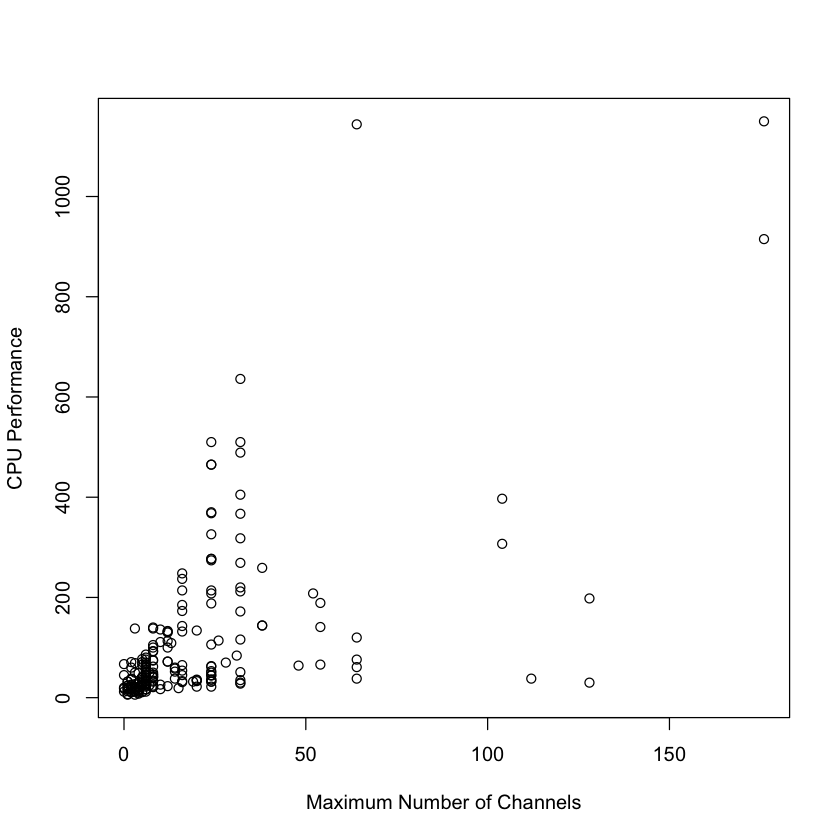

In [6]:
plot(data$chmax, data$performance, xlab="Maximum Number of Channels", ylab="CPU Performance")

There seems to be loose correlation between between the maximum number fo channels and the the CPU performance. In general the CPU performance seems to increase with a higher number of channels.

b. **3 pts** What is the value of the correlation coefficient between _performance_ and _chmax_? Please interpret the strength of the correlation based on the correlation coefficient.

In [7]:
paste("The correlation coefficient is", round(cor(data$chmax, data$performance), 3))

[1] "The correlation coefficient is 0.605"

This indicates a moderate positive linear relationship. Further this shows that 60.5% percent of the variation in the CPU performance is explained by the maximum number of channels.

c. **2 pts** Based on this exploratory analysis, would you recommend a simple linear regression model for the relationship?

Without doing any additional data analysis I would recommend starting with a linear regression model.

d. **1 pts** Based on the analysis above, would you pursue a transformation of the data? *Do not transform the data.*

Yes - I would explore a log tranformation of the response variable as it may improve linearity of the data.

## Question B2: Fitting the Simple Linear Regression Model - 11 pts

Fit a linear regression model, named *model1*, to evaluate the relationship between performance and the maximum number of channels. *Do not transform the data.* The function you should use in R is:

In [9]:
# Your code here...
model1 = lm(performance ~ chmax, data)

summary(model1)


Call:
lm(formula = performance ~ chmax, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-486.47  -42.20  -22.20   20.31  867.15 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2252    10.8587   3.428 0.000733 ***
chmax         3.7441     0.3423  10.938  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 128.3 on 207 degrees of freedom
Multiple R-squared:  0.3663,	Adjusted R-squared:  0.3632 
F-statistic: 119.6 on 1 and 207 DF,  p-value: < 2.2e-16


In [10]:
confint(model1, level = 0.95)

,2.5 %,97.5 %
(Intercept),15.817392,58.633048
chmax,3.069251,4.418926


a. **3 pts** What are the model parameters and what are their estimates?

The model parameters are: $\beta_0$ = 37.2252, $\beta_1$ = 3.7441, $\sigma$ = 128.3 

b. **2 pts** Write down the estimated simple linear regression equation.

$Performance = 3.7441\times Max Channels + 37.2252$

c. **2 pts** Interpret the estimated value of the $\beta_1$ parameter in the context of the problem.

With each additional channel added to the processor teh performance increases by 3.7441.

d. **2 pts** Find a 95% confidence interval for the $\beta_1$ parameter. Is $\beta_1$ statistically significant at this level?

The calculation is completed in the code cell above. The 95% confidence interval for $\beta_1$ is (3.069, 4.419)

e. **2 pts** Is $\beta_1$ statistically significantly positive at an $\alpha$-level of 0.01?  What is the approximate p-value of this test?

The $\beta_1$ value is statistically significantly positive at an $\alpha$-level of 0.01 as evidenced by the p-value of 2e-16.

## Question B3: Checking the Assumptions of the Model - 8 pts

Create and interpret the following graphs with respect to the assumptions of the linear regression model. In other words, comment on whether there are any apparent departures from the assumptions of the linear regression model. Make sure that you state the model assumptions and assess each one.  Each graph may be used to assess one or more model assumptions.

a. **2 pts** Scatterplot of the data with *chmax* on the x-axis and *performance* on the y-axis

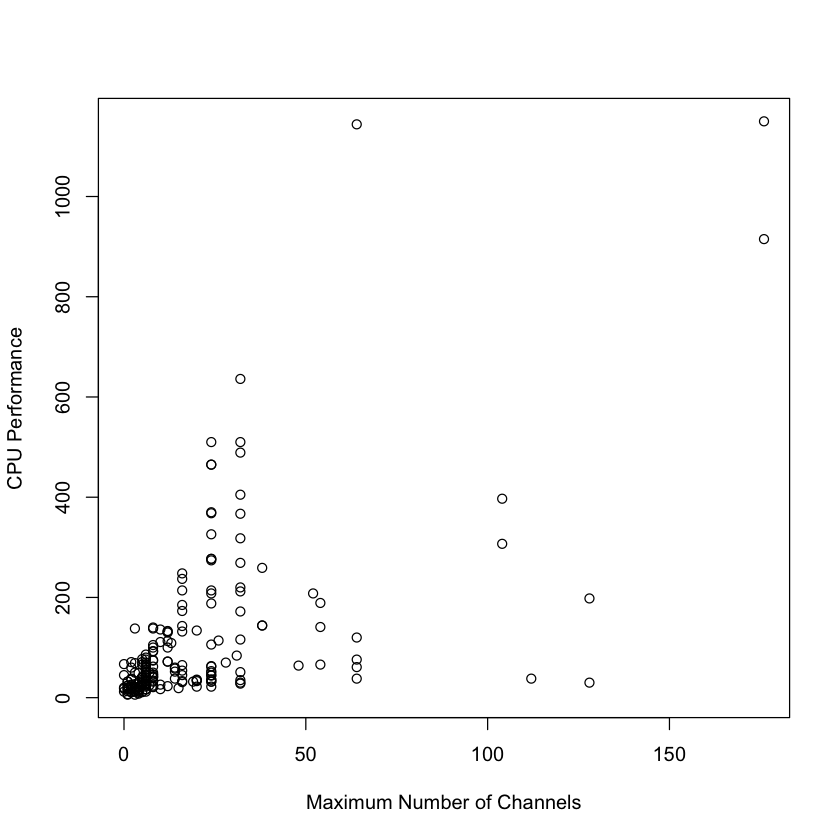

In [11]:
# Your code here...

plot(data$chmax, data$performance, xlab="Maximum Number of Channels", ylab="CPU Performance")


**Model Assumption(s) it checks:**

Linearity Assumption

**Interpretation:**

The dependent and independent variables appear linear. However, a log transformation on the reponse variable may increase the linearity.

b. **3 pts** Residual plot - a plot of the residuals, $\hat\epsilon_i$, versus the fitted values, $\hat{y}_i$

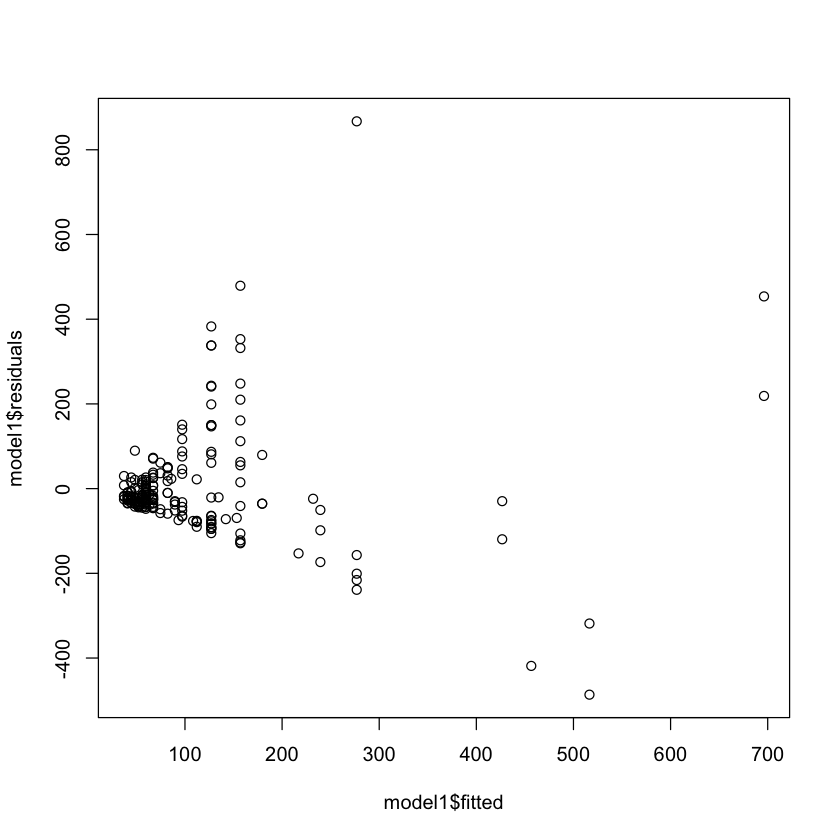

In [12]:
# Your code here...

plot(model1$fitted, model1$residuals)

**Model Assumption(s) it checks:**

Constant variance assumption and independence assumption

**Interpretation:**

No, the constant variance assumption does not hold. The variance increases as the fitted values increase.

There does not appear to be clusters of residuals therefore the independence assumption holds.

c. **3 pts** Histogram and q-q plot of the residuals

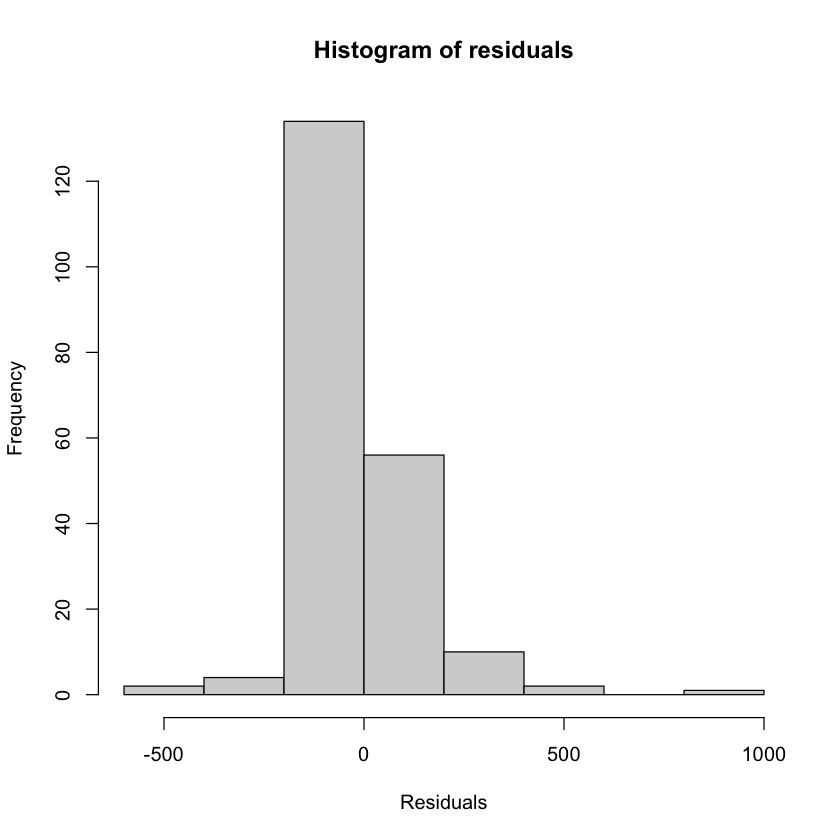

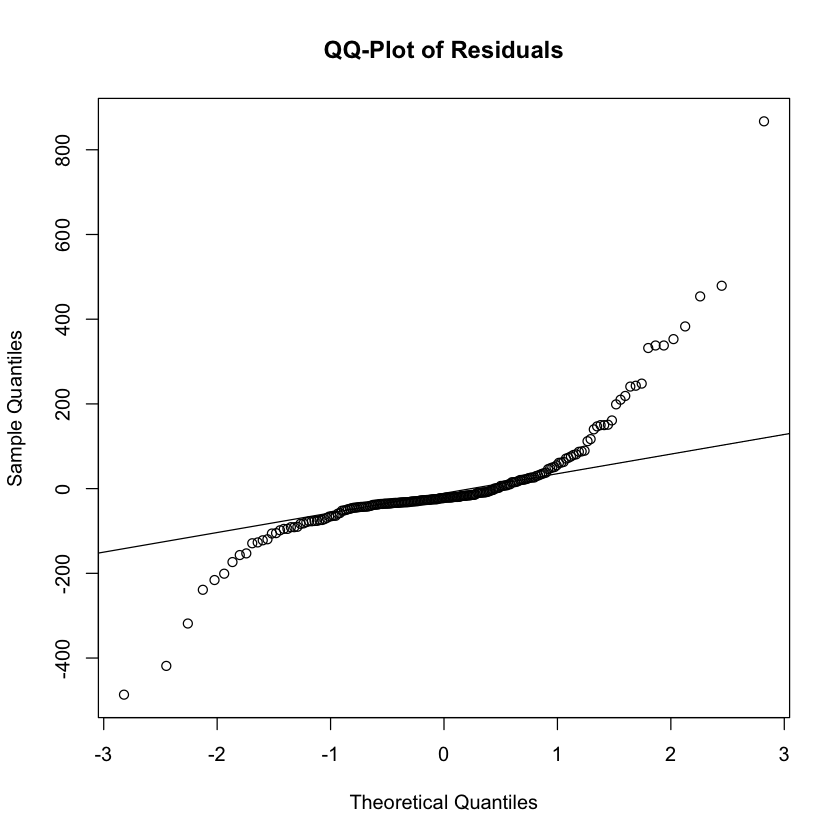

In [13]:
# Your code here...
hist(model1$residuals,main="Histogram of residuals",xlab="Residuals")

qqnorm(model1$residuals, main='QQ-Plot of Residuals')
qqline(model1$residuals)

**Model Assumption(s) it checks:**

Normality

**Interpretation:**

The histogram is reasonably symmetric; however the Q-Q plot depicts heavy tails which is indicitive of a deviation from normality. The normality assumption does not hold.

## Question B4: Improving the Fit - 10 pts

a. **2 pts** Use a Box-Cox transformation (`boxCox()`) in `car()` package or (`boxCox()`) in `MASS()` package) to find the optimal $\lambda$ value rounded to the nearest half integer.  What transformation of the response, if any, does it suggest to perform?

Loading required package: carData



[1] -0.1010101

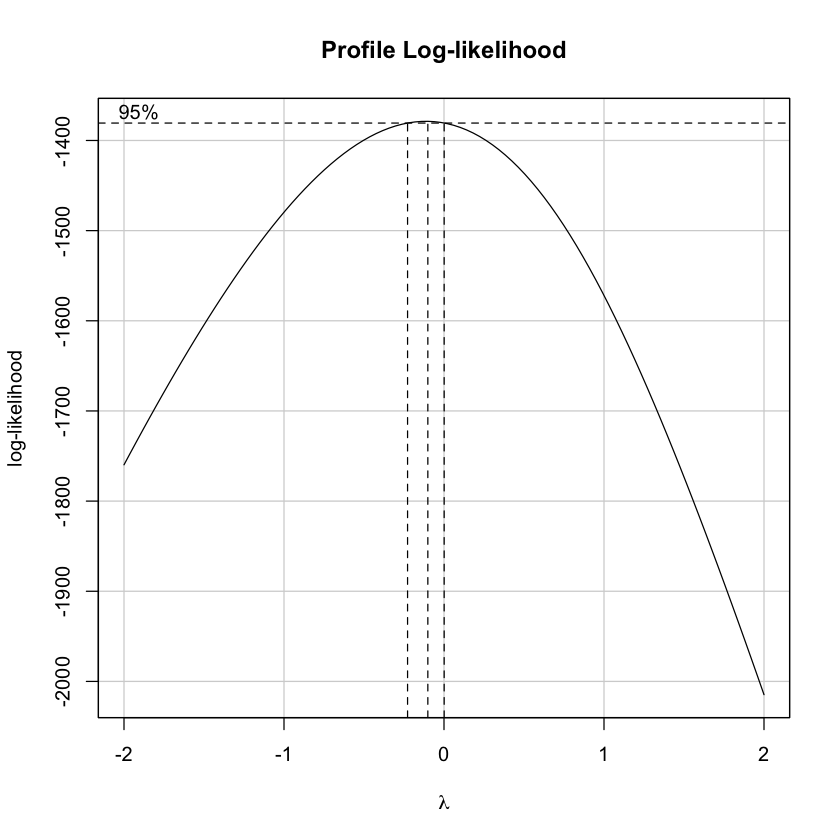

In [14]:
# Your code here...
library(car)

bc <- boxCox(data$performance ~ data$chmax)

lambda <- bc$x[which.max(bc$y)]
lambda

The optimal lambda value rounded to the nearest half integer is 0. This indicates a log transformation should be used on the response variable.

b. **2 pts** Create a linear regression model, named *model2*, that uses the log transformed *performance* as the response, and the log transformed *chmax* as the predictor. Note: The variable *chmax* has a couple of zero values which will cause problems when taking the natural log. Please add one to the predictor before taking the natural log of it

In [15]:
# Your code here...
model2 <- lm(log(performance) ~ log(chmax + 1), data = data)

summary(model2)



Call:
lm(formula = log(performance) ~ log(chmax + 1), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.22543 -0.59429  0.01065  0.59287  1.85995 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.47655    0.14152    17.5   <2e-16 ***
log(chmax + 1)  0.64819    0.05401    12.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.807 on 207 degrees of freedom
Multiple R-squared:  0.4103,	Adjusted R-squared:  0.4074 
F-statistic:   144 on 1 and 207 DF,  p-value: < 2.2e-16


c. **2 pts** Compare the R-squared values of *model1* and *model2*.  Did the transformation improve the explanatory power of the model?

Yes, the r-squared value increased from 0.3632 to 0.4074 therefore the explanatory power of the model was improved.

d. **4 pts** Similar to Question B3, assess and interpret all model assumptions of *model2*.  A model is considered a good fit if all assumptions hold. Based on your interpretation of the model assumptions, is *model2* a good fit?

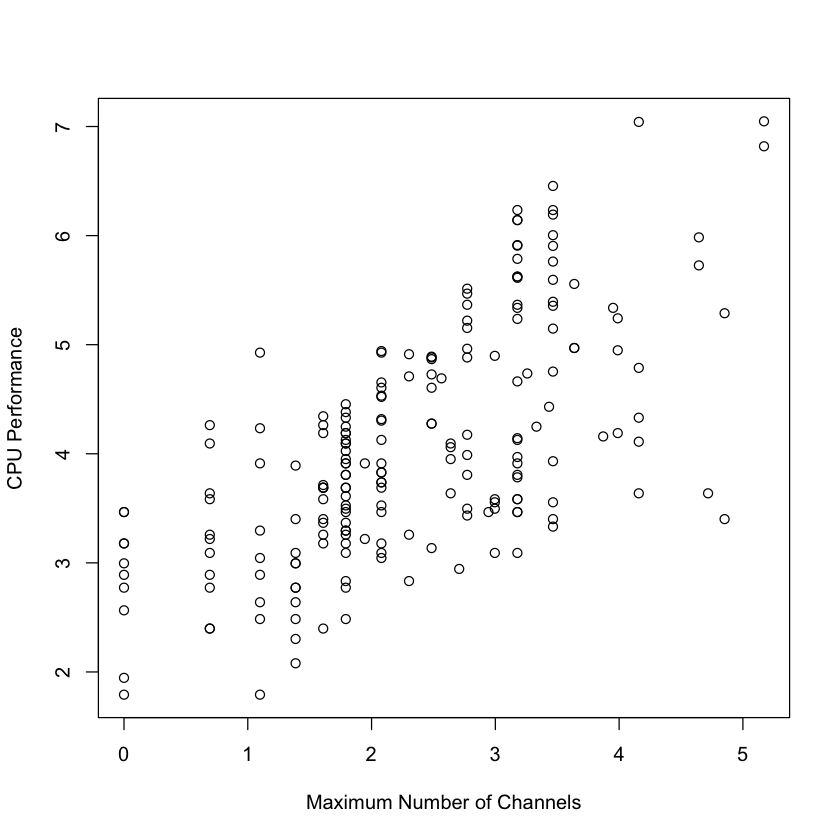

In [16]:
#Scatterplot
plot(log(data$chmax), log(data$performance), xlab="Maximum Number of Channels", ylab="CPU Performance")

The log-log plot displays a linear relationship therefore the linearity assumption holds.

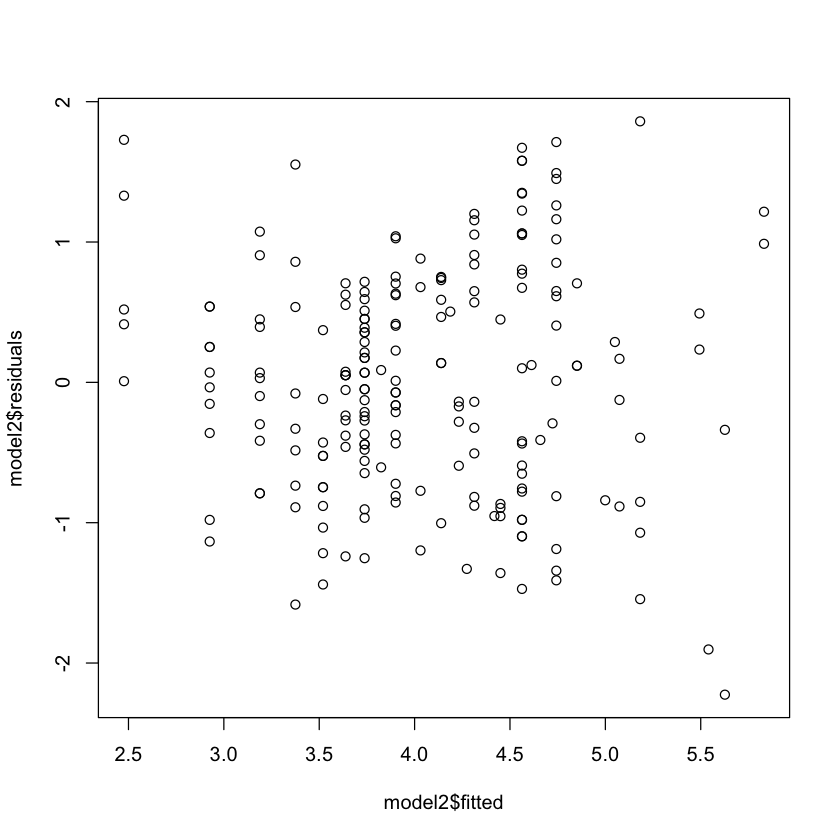

In [17]:
# Residual Analysis
plot(model2$fitted, model2$residuals)

The residual vs fitted plot displays a constant variance about 0 and no clusters along the x-axis. Therefore the constant variance and independence assumptions hold.

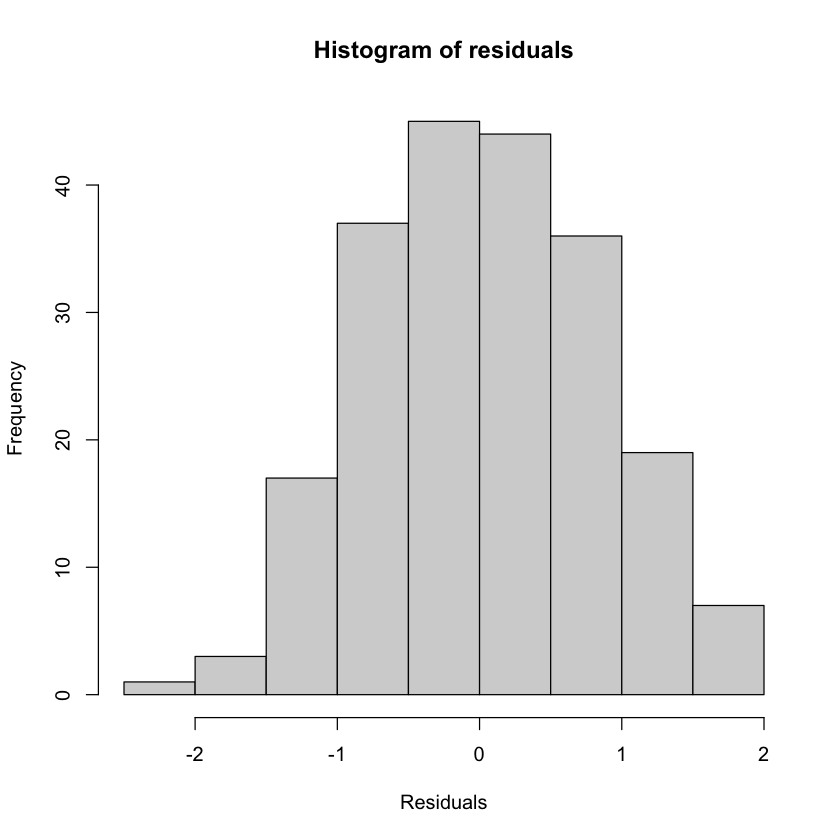

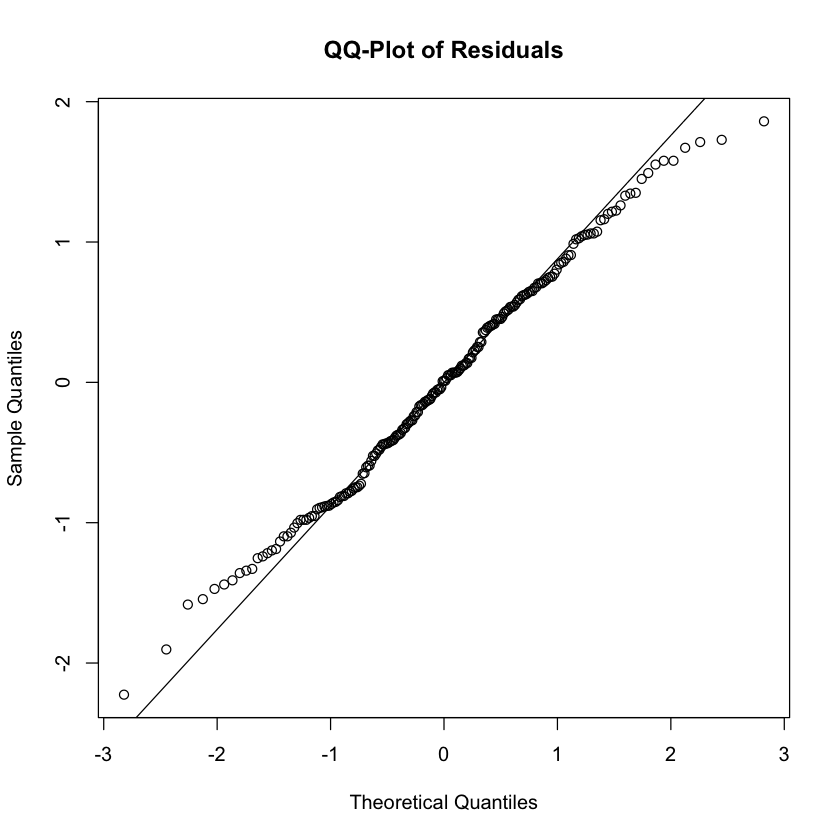

In [18]:
hist(model2$residuals,main="Histogram of residuals",xlab="Residuals")

qqnorm(model2$residuals, main='QQ-Plot of Residuals')
qqline(model2$residuals)

The histogram displays a normal distribution and the Q-Q plot is linear without significant tails at either end. Therefore the normality assumption holds.

## Question B5: Prediction - 3 pts

Suppose we are interested in predicting CPU performance when `chmax = 128`.  Please make a prediction using both *model1* and *model2* and provide the 95% prediction interval of each prediction on the original scale of the response, *performance*. What observations can you make about the result in the context of the problem?

In [19]:
# Your code here...
new = data.frame(chmax=128)

predict(model1, new, interval='prediction',level=0.95)

,fit,lwr,upr
1,516.4685,252.2519,780.6851


In [20]:
# Your code here...
exp(predict(model2, new, interval='prediction',level=0.95))

,fit,lwr,upr
1,277.723,55.17907,1397.813


The log transformations on the predictor and response variables improved the overall model fit as evidence by the increasing r-squared value. However, the range in the 95% predicted confidence interval was significantly larger for the transformed variable model for the data point tested (chmax = 128). Although less percise, the log-log model passed all the linear model assumptions and should be the model of choice.

# Part C. ANOVA - 8 pts

We are going to continue using the CPU data set to analyse various vendors in the data set.  There are over 20 vendors in the data set.  To simplify the task, we are going to limit our analysis to three vendors, specifically, honeywell, hp, and nas.  The code to filter for those vendors is provided below.

In [21]:
# Filter for honeywell, hp, and nas
data2 = data[data$vendor %in% c("honeywell", "hp", "nas"), ]
data2$vendor = factor(data2$vendor)

1. **2 pts** Using `data2`, create a boxplot of *performance* and *vendor*, with *performance* on the vertical axis.  Interpret the plots.  

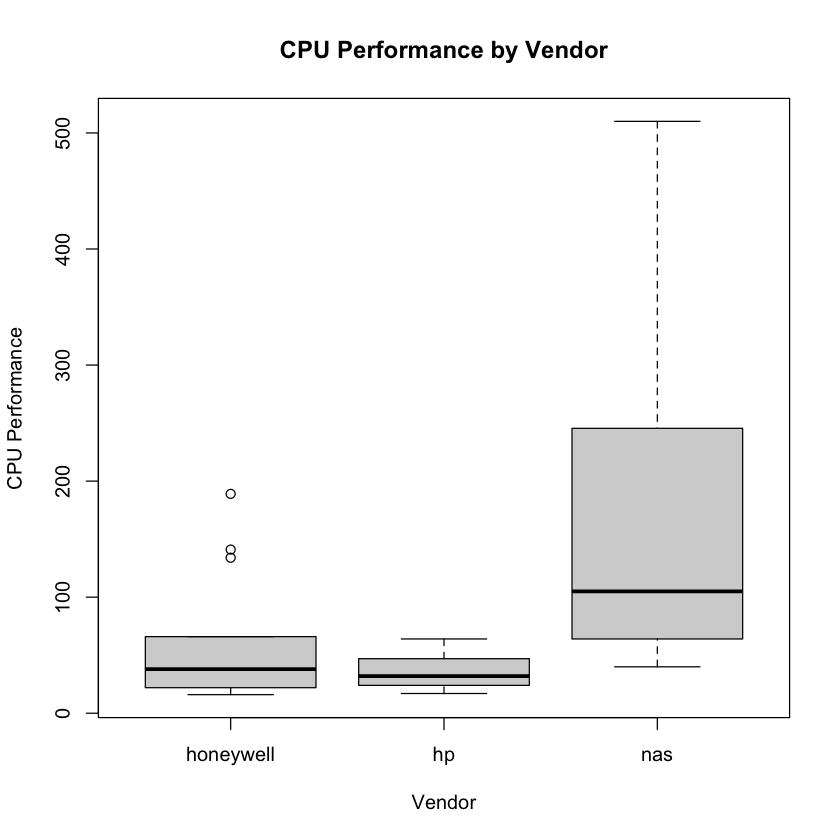

In [22]:
# Your code here...
boxplot(performance ~ vendor, data = data2, main = "CPU Performance by Vendor", xlab = "Vendor", ylab = "CPU Performance")

HP has the lowest CPU performance on average while also having the lowest spread in the data. Honeywell has a slightly higher average performance with a slightly larger performance spread. The highest average CPU performance is by nas; however, there is a very significant spread in performance.

2. **3 pts** Perform an ANOVA F-test on the means of the three vendors.  Using an $\alpha$-level of 0.05, can we reject the null hypothesis that the means of the three vendors are equal?  Please interpret.

In [23]:
# Your code here...
data2.aov = aov(performance~vendor, data = data2)

summary(data2.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)   
vendor       2 154494   77247   6.027 0.00553 **
Residuals   36 461443   12818                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The p-value is less than the $\alpha$-level of 0.05; therefore we reject the null hypothesis that the means of the three vendors are equal.

3. **3 pts** Perform a Tukey pairwise comparison between the three vendors. Using an $\alpha$-level of 0.05, which means are statistically significantly different from each other?

In [24]:
TukeyHSD(data2.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = performance ~ vendor, data = data2)

$vendor
                   diff        lwr      upr     p adj
hp-honeywell  -24.03297 -153.76761 105.7017 0.8934786
nas-honeywell 116.43320   16.82659 216.0398 0.0188830
nas-hp        140.46617   18.11095 262.8214 0.0214092


Given an $\alpha$-level of 0.05; we can conclude that the mean values of nas and honeywell (0.0189) and nas and hp (0.0214) are statistically significant. We cannot conclude that the mean values of hp and honeywell are statistically significant.